#Project Title: Heart Disease Diagnostic Analysis



In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Capstone project/health data.csv')

Mounted at /content/drive


In [ ]:
#extracting csv dataset

df.head()



,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Gender,Heart Disease,num
0,44,2,120,263,0,0,173,0,0.0,1,0,7,Male,Absent,1
1,58,3,120,340,0,0,172,0,0.0,1,0,3,Female,Absent,0
2,64,3,140,335,0,0,158,0,0.0,1,0,3,Male,Present,1
3,42,4,140,226,0,0,178,0,0.0,1,0,3,Male,Absent,1
4,61,4,130,330,0,2,169,0,0.0,1,0,3,Female,Present,0


In [ ]:
#dataset rows and columns count
print(df.shape[0])   #no of rows

print(df.shape[1])    #no of columns


303
15


In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   cp             303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   restecg        303 non-null    int64  
 6   thalach        303 non-null    int64  
 7   exang          303 non-null    int64  
 8   oldpeak        303 non-null    float64
 9   slope          303 non-null    int64  
 10  ca             303 non-null    int64  
 11  thal           303 non-null    int64  
 12  Gender         303 non-null    object 
 13  Heart Disease  303 non-null    object 
 14  num            303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [ ]:
df.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'Gender', 'Heart Disease', 'num'],
      dtype='object')

##There are thirteen features in dataset

age= the person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)



In [ ]:
#checking null values

df.isnull().sum()

,0
age,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0
slope,0


There is no null values in our dataset

#Percentage of people having Heart Disease#


In [ ]:
num=df.groupby('Gender').size()
print(num)

Gender
Female     97
Male      206
dtype: int64


In [ ]:
# converting numerical data into categorical data

def heart_disease(row):
  if row==0:
    return'Absence'
  elif row==1:
    return'Presence'

In [ ]:
df['Heart_Disease']=df['num'].apply(heart_disease)
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Gender,Heart Disease,num,Heart_Disease
0,44,2,120,263,0,0,173,0,0.0,1,0,7,Male,Absent,1,Presence
1,58,3,120,340,0,0,172,0,0.0,1,0,3,Female,Absent,0,Absence
2,64,3,140,335,0,0,158,0,0.0,1,0,3,Male,Present,1,Presence
3,42,4,140,226,0,0,178,0,0.0,1,0,3,Male,Absent,1,Presence
4,61,4,130,330,0,2,169,0,0.0,1,0,3,Female,Present,0,Absence


In [ ]:
hd=df.groupby('Heart_Disease')['num'].count()
hd

,num
Heart_Disease,
Absence,97
Presence,206


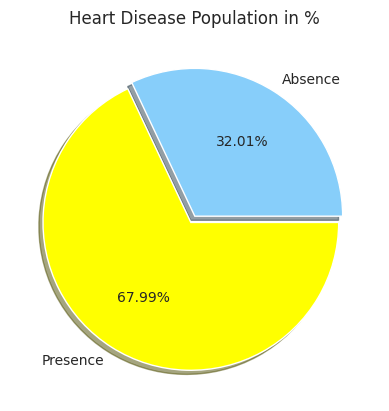

In [ ]:
# Pie chart for heart disease population


labels = ['Absence', 'Presence']
explode = [0,0.05]
colors = ['lightskyblue','yellow']
plt.pie(hd, labels=labels, explode=explode, colors=colors, autopct= '%1.2f%%', shadow=True)
plt.title('Heart Disease Population in %')
plt.show()



from the overall population, people having heart disease (67.99%) and those who don't have heart disease is (32.01%)

<ipython-input-47-8648d09867d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age',data=df, palette='Set2',edgecolor='black')


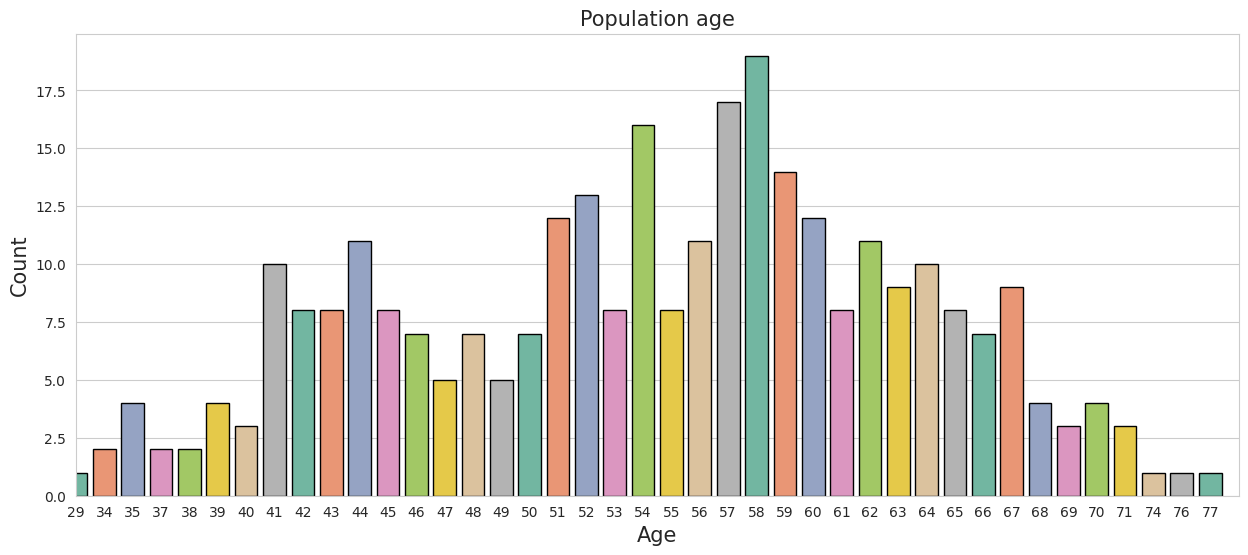

In [ ]:
#countplot for population age using seaborn and matplotlib

plt.figure(figsize=(15,6))
sns.countplot(x='age',data=df, palette='Set2',edgecolor='black')
plt.title('Population age', size = 15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0, 41)
plt.show()



In this chart we can analysis the elderly, middle aged, young people


In [ ]:
# statistical analysis

Minimum_Age=df['age'].min()
Maximum_Age=df['age'].max()
Mean_Age=df['age'].mean()

print("Minimum_Age=", Minimum_Age)
print("Maximum_Age=", Maximum_Age)
print("Mean_Age=", Mean_Age)

Minimum_Age= 29
Maximum_Age= 77
Mean_Age= 54.43894389438944


In [ ]:
# Categorial analysis

Young_age=df[(df['age']>=25) & (df['age']<40)]
Middle_age=df[(df['age']>=40) & (df['age']<55)]
Elderly_age=df[(df['age']>55)]

print('Young_age=', len(Young_age))
print('Middle_age=', len(Middle_age))
print('Elderly_age=', len(Elderly_age))

Young_age= 15
Middle_age= 128
Elderly_age= 152


<ipython-input-76-714fa8a8dba6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young_age','Middle_age','Elderly_age'],y=[len(Young_age),len(Middle_age),len(Elderly_age)],palette='Set2', edgecolor='black')


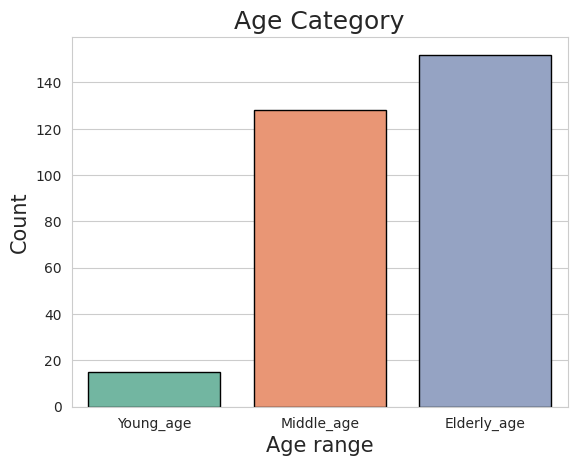

In [ ]:
# Bar plot for age category

sns.barplot(x=['Young_age','Middle_age','Elderly_age'],y=[len(Young_age),len(Middle_age),len(Elderly_age)],palette='Set2', edgecolor='black')
plt.title('Age Category', fontsize=18)
plt.xlabel('Age range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


In [ ]:
def gender(row):
  if row==1:
    return'Male'
  elif row==0:
    return'Female'

In [ ]:
#converting numerical data into categorical data
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [ ]:
df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Gender,Heart Disease,num,Heart_Disease,Age_Range
0,44,2,120,263,0,0,173,0,0.0,1,0,7,Male,Absent,1,Presence,Middle Age
1,58,3,120,340,0,0,172,0,0.0,1,0,3,Female,Absent,0,Absence,Elder Age
2,64,3,140,335,0,0,158,0,0.0,1,0,3,Male,Present,1,Presence,Elder Age
3,42,4,140,226,0,0,178,0,0.0,1,0,3,Male,Absent,1,Presence,Middle Age
4,61,4,130,330,0,2,169,0,0.0,1,0,3,Female,Present,0,Absence,Elder Age


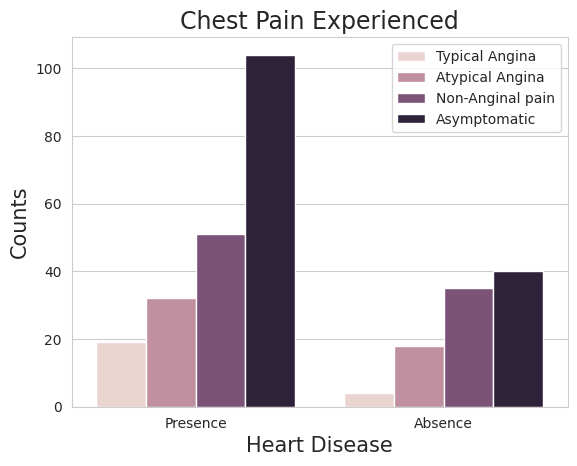

In [ ]:
# count plot for heart disease based on age category

sns.countplot(x=df['Heart_Disease'], hue='cp', data=df, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

##It seems that people having Asymptomatic chest pain is higher chance of heart disease.

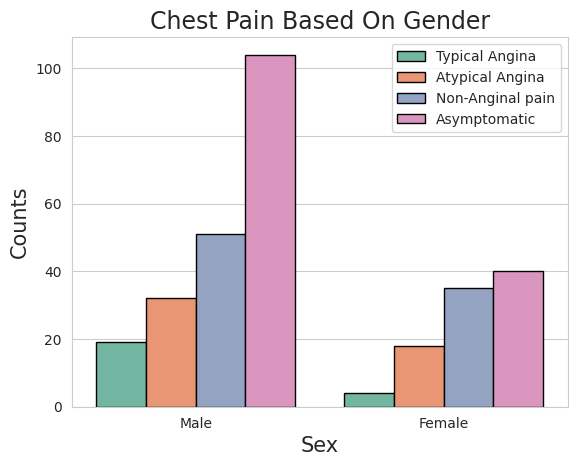

In [ ]:
#Count plot for chest pain based on gender (male & female)

sns.countplot(x=df['Gender'], hue='cp', data=df, palette='Set2', edgecolor='black')
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

##We can see that a higher number of men are suffering from Asymptomatic type of Chest Pain

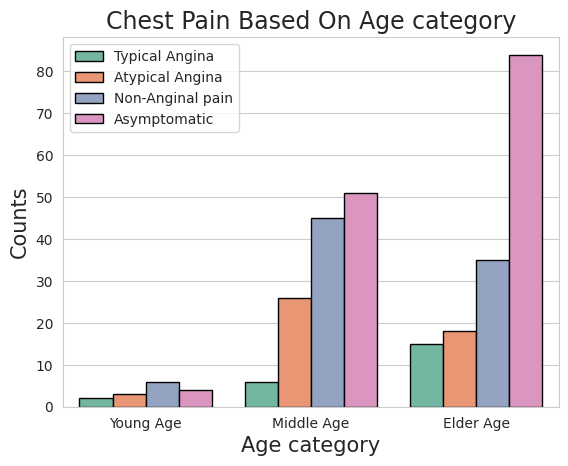

In [ ]:
#Count plot for chest pain based on age category

sns.countplot(x=df['Age_Range'], hue='cp', data=df, order= ['Young Age', 'Middle Age', 'Elder Age'], palette='Set2', edgecolor='black')
plt.title('Chest Pain Based On Age category', fontsize=17)
plt.xlabel('Age category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

##There is very high number of Asymptomatic pain in elder age

<ipython-input-92-38eb4e2dd4b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='trestbps', data=df, palette='Set3', edgecolor='black')


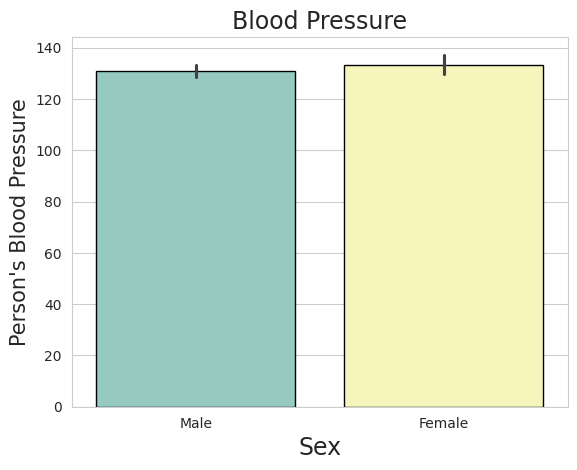

In [ ]:
# bar plot for blood pressure

sns.barplot(x='Gender', y='trestbps', data=df, palette='Set3', edgecolor='black')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=17)
plt.ylabel("Person's Blood Pressure", fontsize=15)
plt.show()

##This seems that both male and female have almost equal

<ipython-input-93-974dad178918>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='chol', data=df, palette='Set1', edgecolor='black')


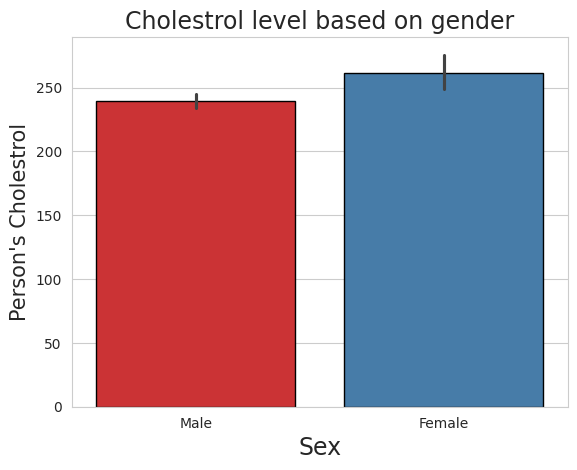

In [ ]:
# barplot for cholestrol level

sns.barplot(x='Gender', y='chol', data=df, palette='Set1', edgecolor='black')
plt.title("Cholestrol level based on gender", fontsize=17)
plt.xlabel('Sex',fontsize=17)
plt.ylabel("Person's Cholestrol", fontsize=15)
plt.show()


##This seems that female have higher cholestrol than male

<ipython-input-98-6e1e972b215b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart Disease', y='chol', data=df, palette='Set2', edgecolor='black')


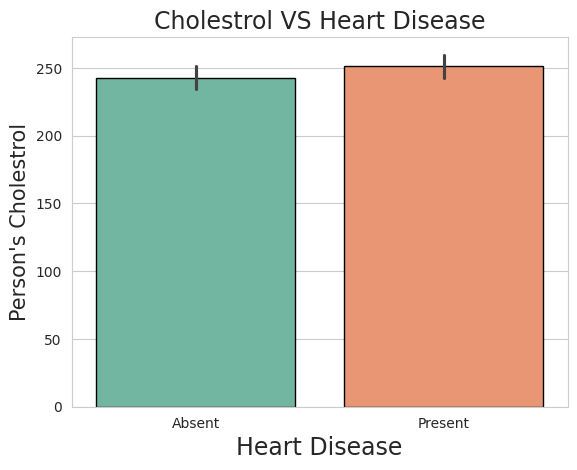

In [ ]:
#bar plot for cholestrol VS heart disease

sns.barplot(x='Heart Disease', y='chol', data=df, palette='Set2', edgecolor='black')
plt.title("Cholestrol VS Heart Disease", fontsize=17)
plt.xlabel('Heart Disease',fontsize=17)
plt.ylabel("Person's Cholestrol", fontsize=15)
plt.show()

##Higher cholestrol level results chances of heart disease

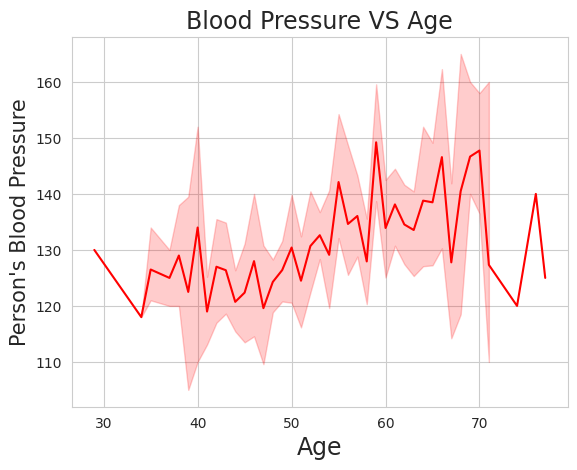

In [ ]:
# line plot for blood pressure VS age category

sns.lineplot(x='age', y='trestbps', data=df, color='red')
plt.title("Blood Pressure VS Age", fontsize=17)
plt.xlabel('Age',fontsize=17)
plt.ylabel("Person's Blood Pressure", fontsize=15)
plt.show()

##Blood pressure increses between age 50 to 70

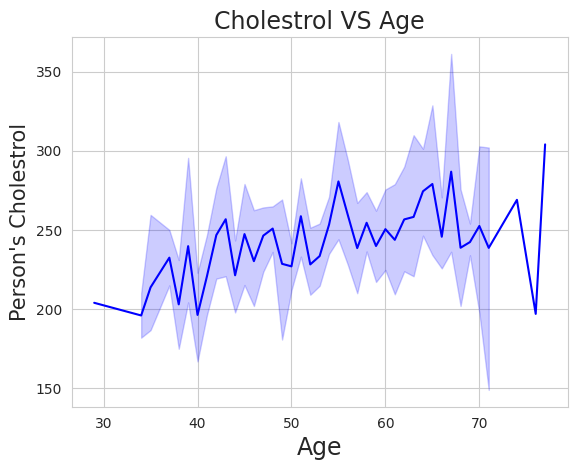

In [ ]:
#Line plot for Cholestrol VS age

sns.lineplot(x='age', y='chol', data=df,color='blue')
plt.title("Cholestrol VS Age", fontsize=17)
plt.xlabel('Age',fontsize=17)
plt.ylabel("Person's Cholestrol", fontsize=15)
plt.show()

##Cholestrol increases between age 50 to 70

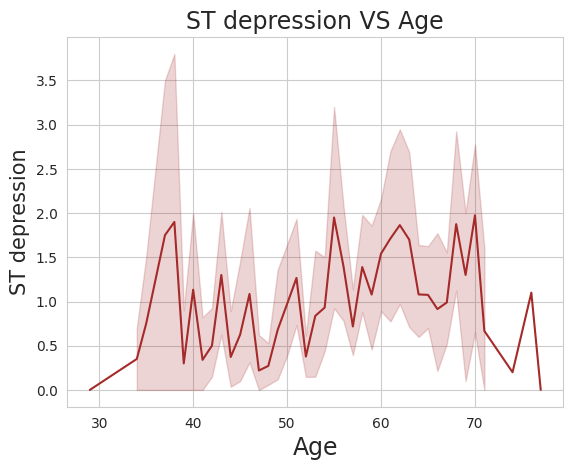

In [ ]:
#Lineplot for ST depression VS Age

sns.lineplot(x='age', y='oldpeak', data=df, color='brown')
plt.title("ST depression VS Age", fontsize=17)
plt.xlabel('Age',fontsize=17)
plt.ylabel("ST depression", fontsize=15)
plt.show()

##ST depression increases between age 30 to 40

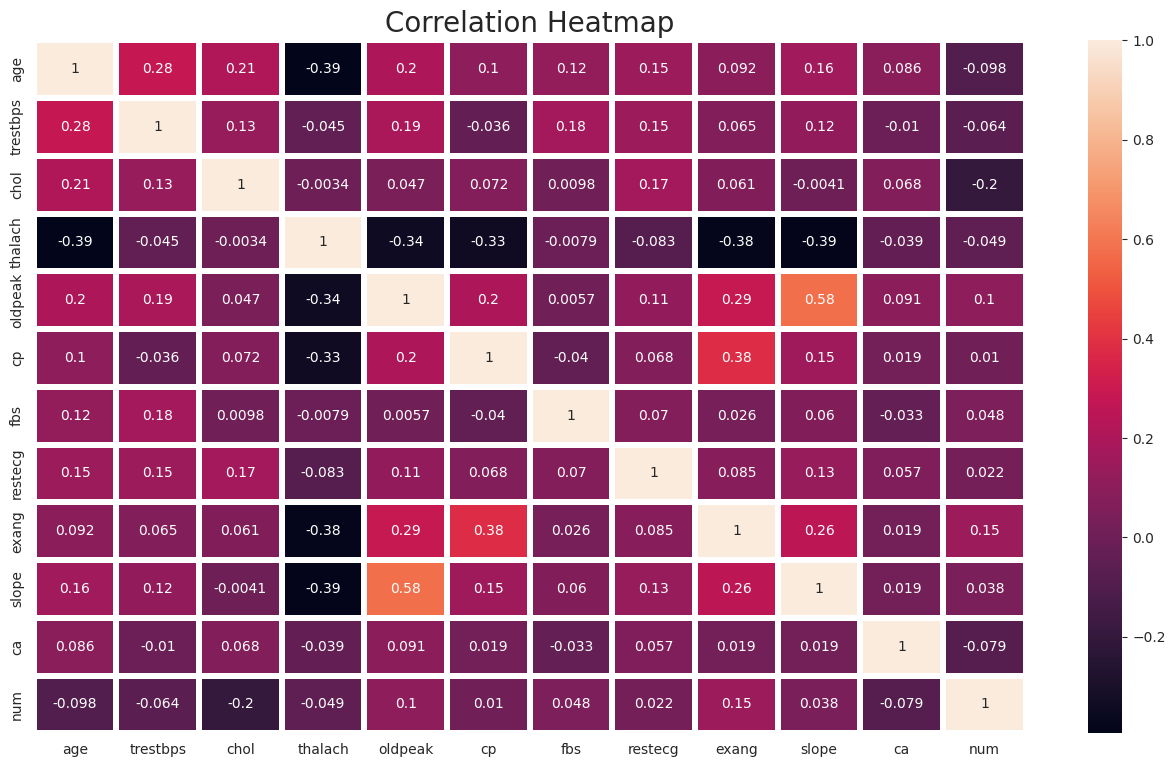

In [ ]:
# Heatmap
numerical_columns= df[['age','trestbps','chol','thalach','oldpeak','cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'num']]
correlation=numerical_columns.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation, annot=True, linewidth=3)
plt.title('Correlation Heatmap',size=20)
plt.show()